In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress



## Question 4.2

In [31]:
HCLonghorn_Depth = pd.read_csv("https://raw.githubusercontent.com/dnicolasespinoza/GeomechanicsJupyter/master/UndergradHomework/HW2/HCLonghorn_Depth-DTC-DTS-RHO.dat", sep="\t", header= [0],skiprows =[1])
HCLonghorn_Depth = HCLonghorn_Depth.apply(pd.to_numeric, errors='coerce')
HCLonghorn_Depth_cleaned = HCLonghorn_Depth.replace(-999.25,np.nan).dropna()

#print(HCLonghorn_Depth_cleaned.head())



HCdeviationsurvey = pd.read_csv("https://raw.githubusercontent.com/dnicolasespinoza/GeomechanicsJupyter/master/UndergradHomework/HW2/HCdeviationsurvey.dev", sep="\t", header = [0] )
#print(HCdeviationsurvey.head())



c:\Users\dimau\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1207: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


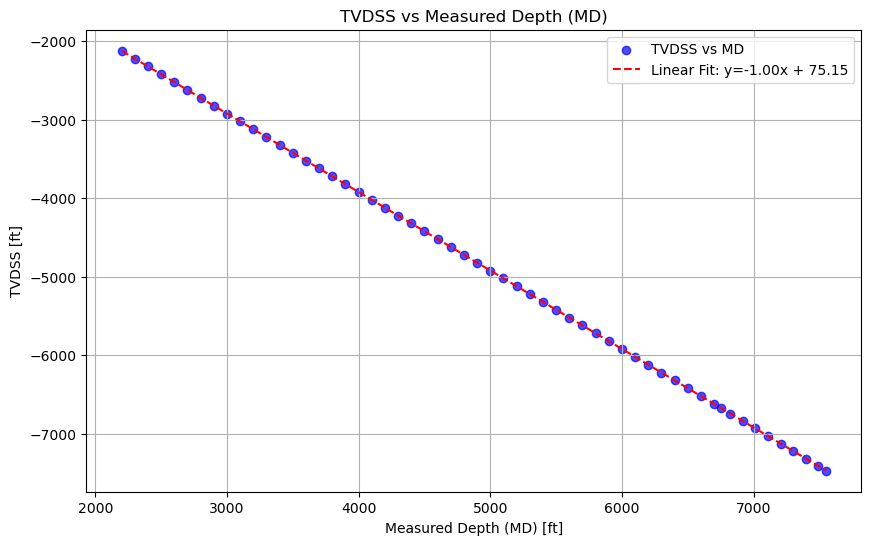

In [34]:

MD = HCLonghorn_Depth_cleaned['Depth(MD)']
TVDSS = HCdeviationsurvey["TVDSS"]


# Create a DataFrame for merging
df_log = pd.DataFrame({'MD': MD_log})
df_survey = pd.DataFrame({'MD': HCdeviationsurvey['MD'], 'TVDSS_corrected': TVDSS_corrected})

merged_df = pd.merge(df_log, df_survey, on='MD', how='inner')

MD_valid = merged_df['MD']
TVDSS_corrected_valid = merged_df['TVDSS_corrected']

slope, intercept, r_value, p_value, std_err = linregress(MD_valid, TVDSS_corrected_valid)

plt.figure(figsize=(10, 6))
plt.scatter(MD_valid, TVDSS_corrected_valid, label='TVDSS vs MD', color='blue', alpha=0.7)
line = slope * MD_valid + intercept
plt.plot(MD_valid, line, color='red', linestyle='--', label=f'Linear Fit: y={slope:.2f}x + {intercept:.2f}')
plt.xlabel('Measured Depth (MD) [ft]')
plt.ylabel('TVDSS [ft]')
plt.title('TVDSS vs Measured Depth (MD)')
plt.legend()
plt.grid(True)
plt.show()

#print(f"Slope: {slope:.2f}")
#print(f"Intercept: {intercept:.2f}")
#print(f"R-squared: {r_value**2:.2f}")
#print(f"P-value: {p_value:.2e}")
#print(f"Standard Error: {std_err:.2f}")


## Question 4.3

c:\Users\dimau\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1207: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


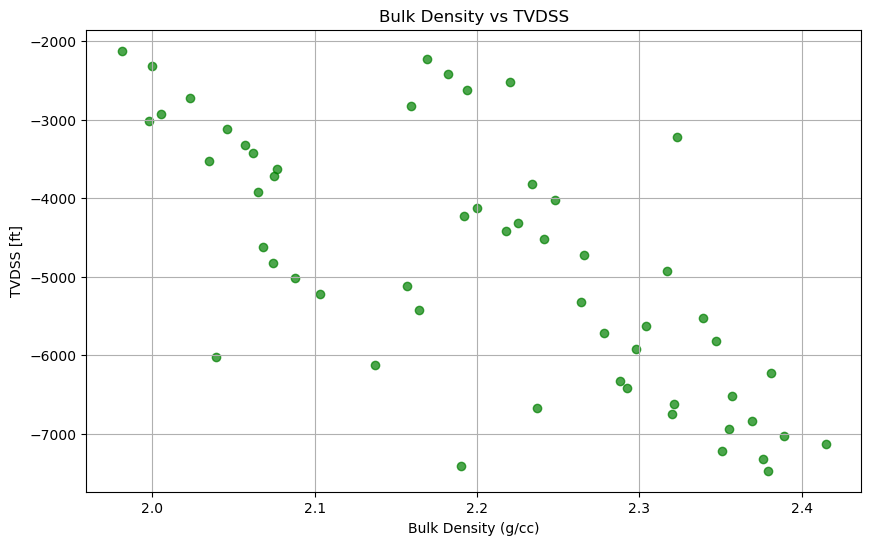

In [33]:
Bulk_Density = HCLonghorn_Depth_cleaned['Bulk Density']
TVDSS = HCdeviationsurvey['TVDSS'] + 38


df_log = pd.DataFrame({'MD': HCLonghorn_Depth_cleaned['Depth(MD)'], 'Bulk_Density': Bulk_Density})
df_survey = pd.DataFrame({'MD': HCdeviationsurvey['MD'], 'TVDSS_corrected': TVDSS})
merged_df = pd.merge(df_log, df_survey, on='MD', how='inner')

Bulk_Density_valid = merged_df['Bulk_Density']
TVDSS_corrected_valid = merged_df['TVDSS_corrected']

plt.figure(figsize=(10, 6))
plt.scatter(Bulk_Density_valid, TVDSS_corrected_valid, label='Bulk Density vs TVDSS', color='green', alpha=0.7)
plt.xlabel('Bulk Density (g/cc)')
plt.ylabel('TVDSS [ft]')
plt.title('Bulk Density vs TVDSS')
plt.grid(True)
plt.show()


## Question 4.4

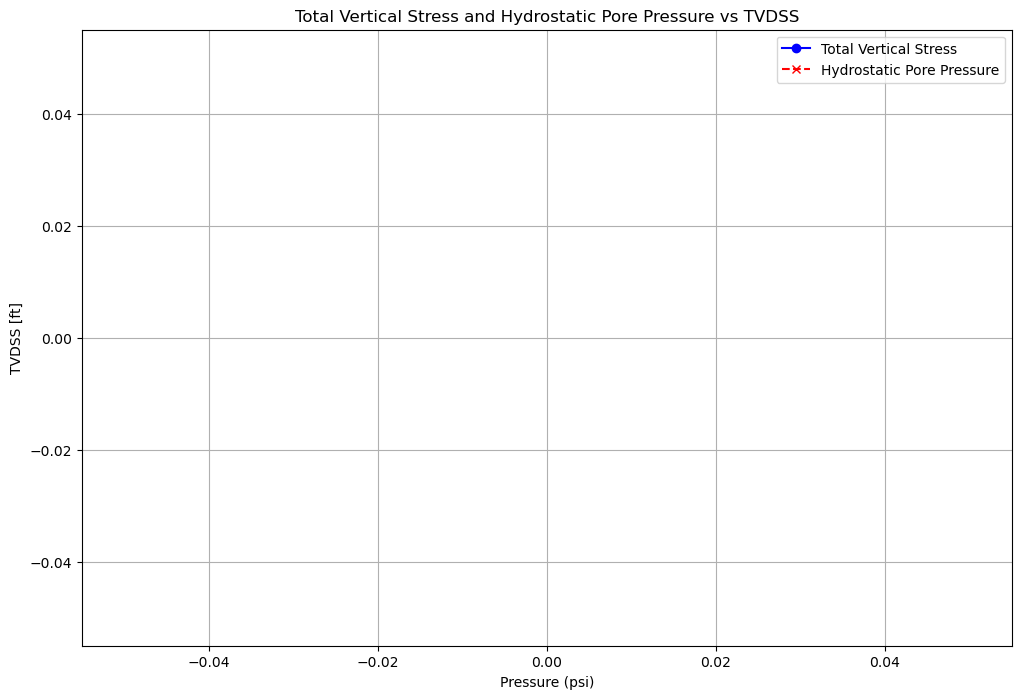

In [35]:

g = 0.433  #psi/ft
rho_water = 62.4  # Density of water in lb/ft^3


depths = HCLonghorn_Depth_cleaned['Depth(MD)']
bulk_density = HCLonghorn_Depth_cleaned['Bulk Density']
depth_increment = np.diff(depths, prepend=depths.iloc[0])  


total_vertical_stress = np.cumsum(bulk_density * g * depth_increment)

# Compute Expected Hydrostatic Pore Pressure
hydrostatic_pore_pressure = depths * g

# Extract TVDSS and adjust for water depth
TVDSS = HCdeviationsurvey['TVDSS'] + 38

# Create DataFrame for plotting
df_stress_pore_pressure = pd.DataFrame({
    'TVDSS_corrected': TVDSS,
    'Total_Vertical_Stress': total_vertical_stress[:len(TVDSS)],  # Align length with TVDSS
    'Hydrostatic_Pore_Pressure': hydrostatic_pore_pressure[:len(TVDSS)]  # Align length with TVDSS
})

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(df_stress_pore_pressure['Total_Vertical_Stress'], df_stress_pore_pressure['TVDSS_corrected'], label='Total Vertical Stress', color='blue', linestyle='-', marker='o')
plt.plot(df_stress_pore_pressure['Hydrostatic_Pore_Pressure'], df_stress_pore_pressure['TVDSS_corrected'], label='Hydrostatic Pore Pressure', color='red', linestyle='--', marker='x')
plt.xlabel('Pressure (psi)')
plt.ylabel('TVDSS [ft]')
plt.title('Total Vertical Stress and Hydrostatic Pore Pressure vs TVDSS')
plt.legend()
plt.grid(True)
plt.show()